<center>
    <h1>Bank Loan Default Case</h1>
</center>

**Background:** 
The loan default dataset has 8 variables and 850 records, each record being loan default status for each customer. Each Applicant was rated as “Defaulted” or “Not-Defaulted”. New applicants for loan application can also be evaluated on these 8 predictor variables and classified as a default or non-default based on predictor variables.  


# 1. Set Environment and load packages

In [1]:
import os

In [2]:
os.chdir("C:/Users/Abhishek/Desktop/Bank_Loan_Edwisor/Bank_Loan_Python")

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate



# 2. Load dataset and Data Pre Processing

## Data Pre-Processing 

### Load Dataset

In [4]:
bankloans = pd.read_csv("bank-loan.csv")

In [5]:
bankloans.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [6]:
bankloans.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

In [7]:
#number of observations and features
bankloans.shape

(850, 9)

In [8]:
#data types in the dataframe
bankloans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
age         850 non-null int64
ed          850 non-null int64
employ      850 non-null int64
address     850 non-null int64
income      850 non-null int64
debtinc     850 non-null float64
creddebt    850 non-null float64
othdebt     850 non-null float64
default     700 non-null float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


# 3.  Checking for missing values

In [9]:
#check for any column has missing values
bankloans.isnull().any()

age         False
ed          False
employ      False
address     False
income      False
debtinc     False
creddebt    False
othdebt     False
default      True
dtype: bool

In [10]:
#check for number of missing values
bankloans.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

# 4.1 Separate the numeric and categorical variable names & 
# 4.2 splitting the data set into two sets - existing customers and new customers
       
       

In [11]:
#Segregating the numeric and categorical variable names

numeric_var_names = [key for key in dict(bankloans.dtypes) if dict(bankloans.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
catgorical_var_names = [key for key in dict(bankloans.dtypes) if dict(bankloans.dtypes)[key] in ['object']]


In [12]:
numeric_var_names

['age',
 'ed',
 'employ',
 'address',
 'income',
 'debtinc',
 'creddebt',
 'othdebt',
 'default']

In [13]:
#splitting the data set into two sets - existing customers and new customers

bankloans_existing = bankloans.loc[bankloans.default.isnull() == 0] #isnulll is false
bankloans_new = bankloans.loc[bankloans.default.isnull() == 1] #isnull is true

In [14]:
bankloans_existing.shape

(700, 9)

In [15]:
bankloans_existing.describe(percentiles=[.25,0.5,0.75,0.90,0.95])

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,34.860000,1.722857,8.388571,8.278571,45.601429,10.260571,1.553553,3.058209,0.261429
std,7.997342,0.928206,6.658039,6.824877,36.814226,6.827234,2.117197,3.287555,0.439727
min,20.000000,1.000000,0.000000,0.000000,14.000000,0.400000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.000000,0.369059,1.044178,0.000000
50%,34.000000,1.000000,7.000000,7.000000,34.000000,8.600000,0.854869,1.987567,0.000000
75%,40.000000,2.000000,12.000000,12.000000,55.000000,14.125000,1.901955,3.923065,1.000000
90%,46.000000,3.000000,18.000000,18.000000,82.000000,19.610000,3.621504,7.036180,1.000000
95%,49.000000,4.000000,21.050000,22.000000,113.000000,23.800000,5.098264,9.501648,1.000000
max,56.000000,5.000000,31.000000,34.000000,446.000000,41.300000,20.561310,27.033600,1.000000


# 5. Checking for Outliers

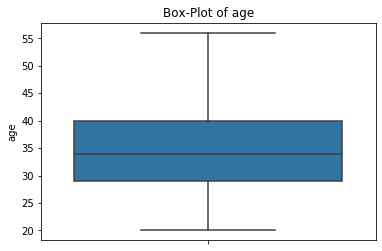

In [16]:
sns.boxplot(y = "age",data=bankloans_existing)
plt.title("Box-Plot of age")
plt.show()

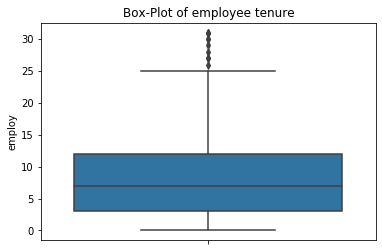

In [17]:
sns.boxplot(y = "employ",data=bankloans_existing)
plt.title("Box-Plot of employee tenure")
plt.show()

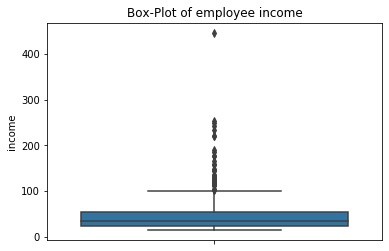

In [18]:
sns.boxplot(y = "income",data=bankloans_existing)
plt.title("Box-Plot of employee income")
plt.show()

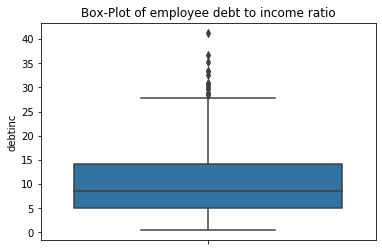

In [19]:
sns.boxplot(y = "debtinc",data=bankloans_existing)
plt.title("Box-Plot of employee debt to income ratio")
plt.show()

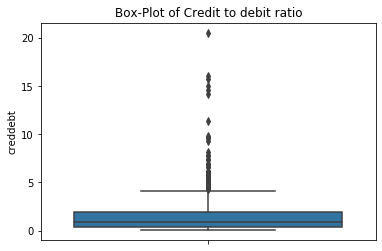

In [20]:
sns.boxplot(y = "creddebt",data=bankloans_existing)
plt.title("Box-Plot of Credit to debit ratio")
plt.show()

In [21]:
income_minlimit = bankloans_existing["income"].quantile(0.75) + 1.5 * (bankloans_existing["income"].quantile(0.75) - bankloans_existing["income"].quantile(0.25))
income_minlimit

101.5

#clip_upper() is used to trim values at specified input threshold. We use this function to trim all the values above the threshold of the input value to the specified input value.
#quantile() function return values at the given quantile over requested axis, a numpy.percentile.


#Trim as in it deletes the outlier and replaces it with the upper limit value

In [22]:
def outlier_capping(x):
    """A funtion to remove and replace the outliers for numerical columns"""
    x = x.clip_upper(x.quantile(0.95))
    
    return(x)

# 5.1 outlier treatment

In [23]:
#outlier treatment
bankloans_existing = bankloans_existing.apply(lambda x: outlier_capping(x))

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
bankloans_existing.isnull().any()

age         False
ed          False
employ      False
address     False
income      False
debtinc     False
creddebt    False
othdebt     False
default     False
dtype: bool

    # 6 Correlation

In [25]:
##Correlation Matrix
bankloans_existing.corr()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
age,1.000000,0.015304,0.538677,0.592123,0.559895,0.013941,0.313544,0.365475,-0.148576
ed,0.015304,1.000000,-0.154969,0.053037,0.203476,0.010483,0.099387,0.152067,0.118521
employ,0.538677,-0.154969,1.000000,0.326449,0.709044,-0.047867,0.392857,0.414345,-0.297359
address,0.592123,0.053037,0.326449,1.000000,0.353059,0.018681,0.222171,0.243844,-0.167796
income,0.559895,0.203476,0.709044,0.353059,1.000000,-0.014102,0.541283,0.609575,-0.125480
debtinc,0.013941,0.010483,-0.047867,0.018681,-0.014102,1.000000,0.575929,0.645586,0.381220
creddebt,0.313544,0.099387,0.392857,0.222171,0.541283,0.575929,1.000000,0.645782,0.217890
othdebt,0.365475,0.152067,0.414345,0.243844,0.609575,0.645586,0.645782,1.000000,0.125387
default,-0.148576,0.118521,-0.297359,-0.167796,-0.125480,0.381220,0.217890,0.125387,1.000000


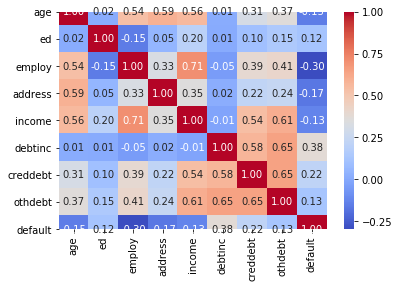

In [26]:
#Visualize the correlation using seaborn heatmap

sns.heatmap(bankloans_existing.corr(),annot=True,fmt="0.2f",cmap="coolwarm")
plt.show()

In [27]:
bankloans_existing.shape

(700, 9)

In [28]:
bankloans_new.shape

(150, 9)

In [29]:
#Indicator variable unique types

bankloans_existing['default'].value_counts()

0.0    517
1.0    183
Name: default, dtype: int64

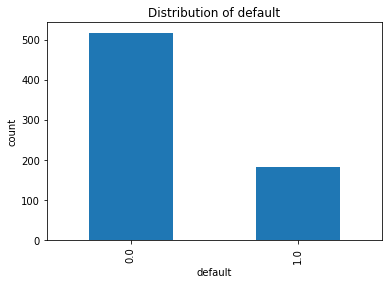

In [30]:
bankloans_existing['default'].value_counts().plot.bar()
plt.xlabel("default")
plt.ylabel("count")
plt.title("Distribution of default")
plt.show()

In [31]:
#percentage of unique types in indicator variable

round(bankloans_existing['default'].value_counts()/bankloans_existing.shape[0] * 100,3)

0.0    73.857
1.0    26.143
Name: default, dtype: float64

## Data Exploratory Analysis
- Bivariate Analysis - Numeric(TTest)/ Categorical(Chisquare)
- Bivariate Analysis - Visualization
- Variable Reduction - Multicollinearity

In [32]:
## performing the independent t test on numerical variables

tstats_df = pd.DataFrame()

for eachvariable in numeric_var_names:
    tstats = stats.ttest_ind(bankloans_existing.loc[bankloans_existing["default"] == 1,eachvariable],bankloans_existing.loc[bankloans_existing["default"] == 0, eachvariable],equal_var=False)
    temp = pd.DataFrame([eachvariable, tstats[0], tstats[1]]).T
    temp.columns = ['Variable Name', 'T-Statistic', 'P-Value']
    tstats_df = pd.concat([tstats_df, temp], axis=0, ignore_index=True)
    
tstats_df =  tstats_df.sort_values(by = "P-Value").reset_index(drop = True)

# P <0.05 therefore we reject null hypo.
Null hypo = 
<br>
Alternate hype = Bothe means from different distributions(which is that the population means are not equal)
<br>
P<0.05 ARE for :
Age=true,Address(P: 0.00000207201)=true,creddebt(P: 0.000000390256)=true,etc

In [33]:
tstats_df

,Variable Name,T-Statistic,P-Value
0,default,inf,0
1,debtinc,9.95554,3.85688e-20
2,employ,-9.03873,7.73766e-18
3,creddebt,5.20625,3.90256e-07
4,address,-4.82342,2.07201e-06
5,age,-3.83057,0.0001557
6,income,-3.51615,0.000495008
7,othdebt,3.13998,0.00186546
8,ed,3.02788,0.00267847


### Bi-Variate Analysis

In [34]:
def BivariateAnalysisPlot(segment_by):
    """A funtion to analyze the impact of features on the target variable"""
    
    fig, ax = plt.subplots(ncols=1,figsize = (10,8))
    
    #boxplot
    sns.boxplot(x = 'default', y = segment_by, data=bankloans_existing)
    plt.title("Box plot of "+segment_by)
    
    
    plt.show()
    

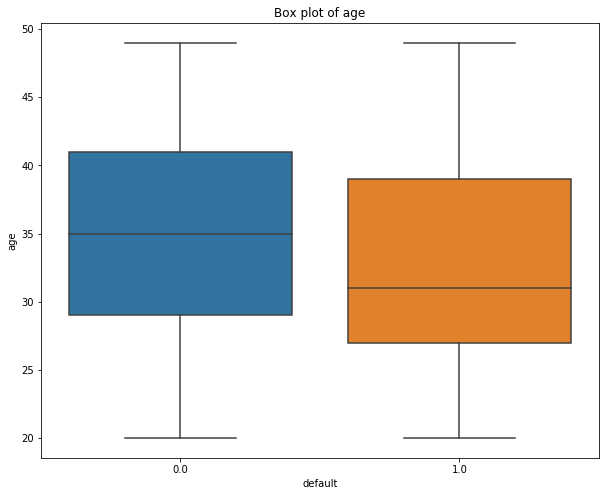

In [35]:
BivariateAnalysisPlot("age")
#For default 0 the average age is 35, default 1 is 32

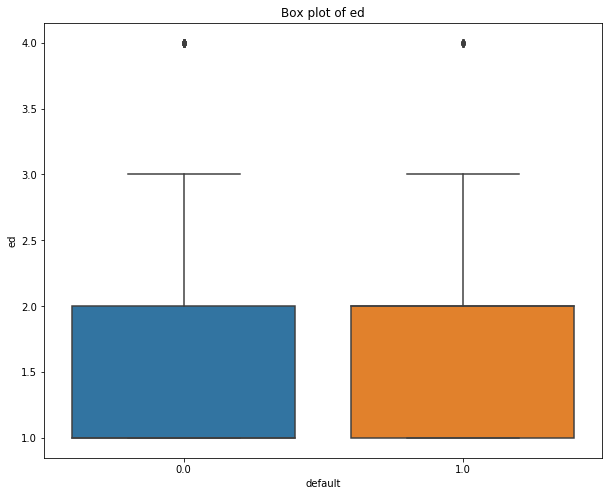

In [36]:
BivariateAnalysisPlot("ed")
#Both Same

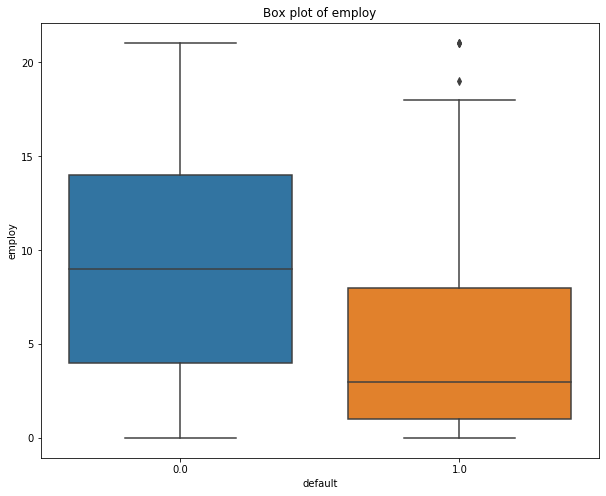

In [37]:
BivariateAnalysisPlot("employ")
##For default 0 the avrage eploy is 8, default 1 is 3

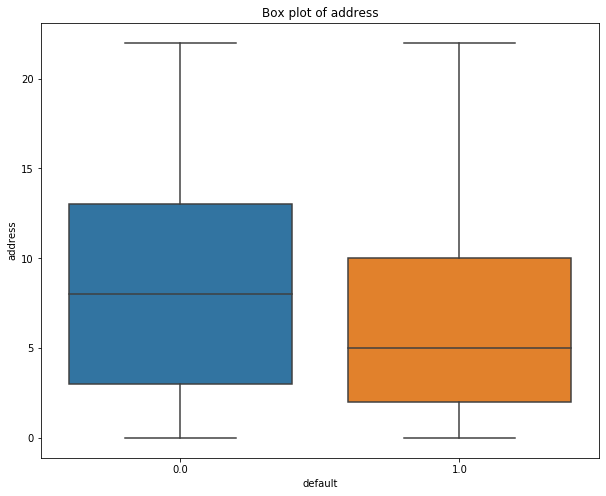

In [38]:
BivariateAnalysisPlot("address")
#For default 0 its 8, for default 1 its 5

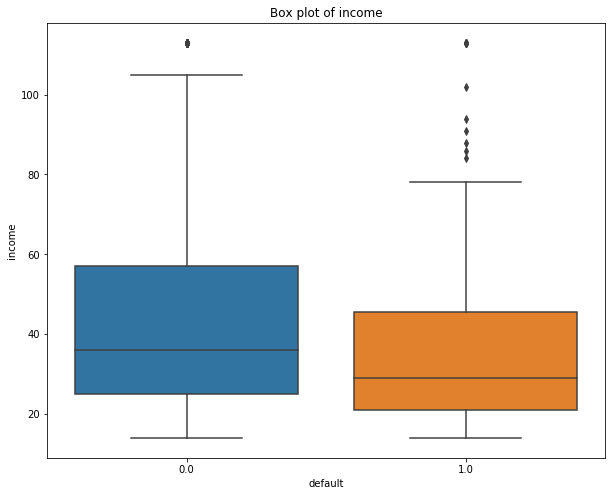

In [39]:
BivariateAnalysisPlot("income")
#For default 0 its 35, for default 1 its 25

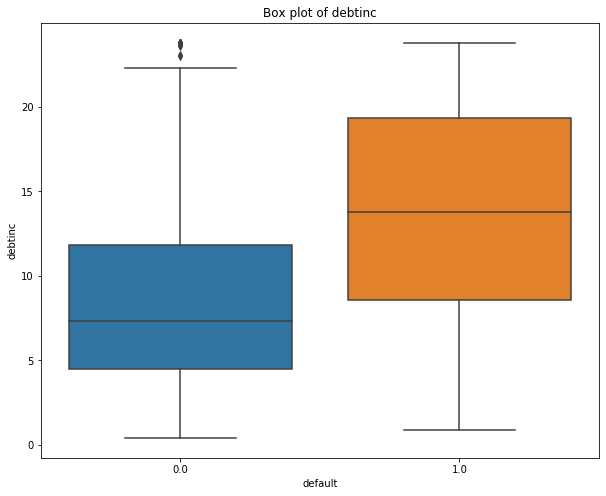

In [40]:
BivariateAnalysisPlot("debtinc")
#For default 0 its 8, for default 1 its 13

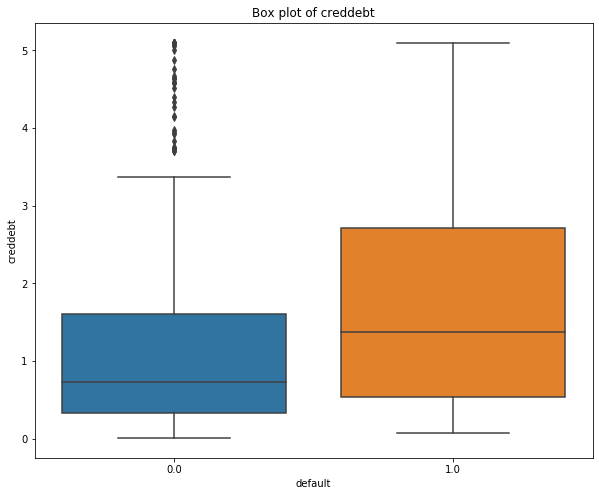

In [41]:
BivariateAnalysisPlot("creddebt")
#For default 0 its 0.5, for default 1 its 1.5

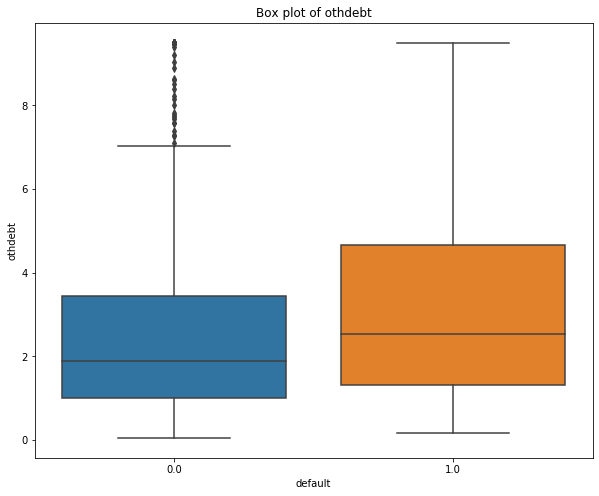

In [42]:
BivariateAnalysisPlot("othdebt")

    ### Multi Collinearity Check

In [43]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:
features = "+".join(bankloans_existing.columns.difference(["default"]))

In [45]:
features

'address+age+creddebt+debtinc+ed+employ+income+othdebt'

In [46]:
#perform vif

a, b = dmatrices(formula_like= 'default ~ ' + features,data=bankloans_existing,return_type="dataframe")
vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["Features"] = b.columns

In [47]:
vif

,VIF Factor,Features
0,41.554332,Intercept
1,1.549227,address
2,2.069008,age
3,2.928049,creddebt
4,5.049334,debtinc
5,1.292872,ed
6,2.624197,employ
7,5.908874,income
8,5.340459,othdebt


### Observations
----
<big>
- There are 850 observations and 9 features in the data set
- All 9 features are numerical in nature
- There are no missing values in the data set
- Out of 850 customers data, 700 are existing customers and 150 are new customers
- In the 700 existing customers, 517 customers are tagged as non defaulters and remaining 183 are tagged as defaulters
- The data is highly imbalanced
- From VIF check, found out that the correlation between the variables is within the acceptable limits

## Model Building and Model Diagnostics

   - Logistic Regression
   - Decision Tree classifier
---
**Model Diagnostics**

- Train and Test split
- Significance of each Variable
- Gini and ROC / Concordance analysis
- Classification Table Analysis - Accuracy

# Model 1 : Logistic Regression

In [48]:
#fearturecolumns has all columns except 'default'
featurecolumns = bankloans_existing.columns.difference(['default'])
featurecolumns

Index(['address', 'age', 'creddebt', 'debtinc', 'ed', 'employ', 'income',
       'othdebt'],
      dtype='object')

In [49]:
#Train and test split

train_X,test_X,train_y,test_y = train_test_split(bankloans_existing[featurecolumns],
                                                 bankloans_existing['default'], stratify = bankloans_existing['default'], test_size = 0.2, random_state = 123)

In [50]:
train_X.shape

(560, 8)

In [51]:
test_X.shape

(140, 8)

In [52]:
train_y.shape

(560,)

In [53]:
test_y.shape

(140,)

In [54]:
train_y.unique()

array([0., 1.])

In [55]:
round(train_y.value_counts()/train_y.shape[0] * 100,3)

0.0    73.929
1.0    26.071
Name: default, dtype: float64

In [56]:
train_y.value_counts()

0.0    414
1.0    146
Name: default, dtype: int64

# logreg.fit() to fit the model

In [57]:
## Model Building

logreg = LogisticRegression()
logreg.fit(train_X,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
#Features and their coefficients

coefficient_df =  pd.DataFrame({'Features' : pd.Series(featurecolumns),
                        "Coefficients" : pd.Series(logreg.coef_[0])})
coefficient_df

,Features,Coefficients
0,address,-0.108351
1,age,0.026468
2,creddebt,0.573523
3,debtinc,0.095613
4,ed,0.139824
5,employ,-0.214868
6,income,0.005024
7,othdebt,-0.002270


In [59]:
logreg.intercept_

array([-2.04636525])

### Model Performance 
- Test data set

#### Metrics

- Recall: Ratio of the total number of correctly classified positive examples divide to the total number of positive examples. High Recall indicates the class is correctly recognized
- Precision: To get the value of precision we divide the total number of correctly classified positive examples by the total number of predicted positive examples. High Precision indicates an example labeled as positive is indeed positive

# logreg.predict() to predict the Data
#see differenve between predicted value and Actual value

In [60]:
#Predicting the test cases
bankloans_test_pred_log = pd.DataFrame({'actual':test_y, 'predicted': logreg.predict(test_X)}) #here we predict
bankloans_test_pred_log = bankloans_test_pred_log.reset_index()
bankloans_test_pred_log.head()

,index,actual,predicted
0,145,0.0,0.0
1,526,0.0,0.0
2,689,0.0,0.0
3,430,1.0,1.0
4,245,0.0,0.0


In [61]:
#creating a confusion matrix

cm_logreg = metrics.confusion_matrix(bankloans_test_pred_log.actual,
                                    bankloans_test_pred_log.predicted,labels = [1,0])
cm_logreg

array([[20, 17],
       [ 9, 94]], dtype=int64)

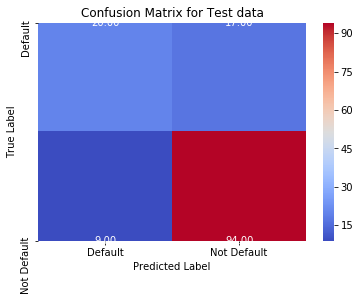

In [62]:
#Visualize the confusion matrix
sns.heatmap(cm_logreg,annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels = ["Default", "Not Default"] , yticklabels = ["Default", "Not Default"])
plt.title("Confusion Matrix for Test data")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [63]:
#find precision score

prec_score = metrics.precision_score(bankloans_test_pred_log.actual, bankloans_test_pred_log.predicted)
print("Precision score :", round(prec_score,3))

Precision score : 0.69


In [64]:
recall_score = metrics.recall_score(bankloans_test_pred_log.actual, bankloans_test_pred_log.predicted)
print("recall_score:", round(recall_score , 3))

recall_score: 0.541


In [65]:
#find the overall accuracy of model

acc_score = metrics.accuracy_score(bankloans_test_pred_log.actual,bankloans_test_pred_log.predicted)
print("Accuracy of model :", round(acc_score,3))

Accuracy of model : 0.814


In [66]:
bankloans_test_pred_log.actual.value_counts()

0.0    103
1.0     37
Name: actual, dtype: int64

In [67]:
print(metrics.classification_report(bankloans_test_pred_log.actual, bankloans_test_pred_log.predicted))

              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88       103
         1.0       0.69      0.54      0.61        37

    accuracy                           0.81       140
   macro avg       0.77      0.73      0.74       140
weighted avg       0.81      0.81      0.81       140



##  Inference
-----

<big>
Overall test accuracy is 80%. But it is not a good measure. There are lot of cases which are default and the model has predicted them as not default. The objective of the model is to identify the customers who will default, so that the bank can intervene and act.This might be the case as the default model assumes people with more than 0.5 probability will not default. 
</big>


# This might be the case as the default model assumes people with more than 0.5 probability will not default. 
<br>

# So we now find the optimum cutoff value

### Find the optimum cutoff value

In [68]:
#probabilty of prediction
#logreg.predict_proba() Function used
# here 0.789495… is the probability that the output will be 0 and 0.210505… is the probability of output being 1

predict_prob_df = pd.DataFrame(logreg.predict_proba(test_X))
predict_prob_df.head()

,0,1
0,0.789495,0.210505
1,0.937453,0.062547
2,0.720855,0.279145
3,0.198867,0.801133
4,0.624400,0.375600


In [69]:
bankloans_test_pred_log.head()

,index,actual,predicted
0,145,0.0,0.0
1,526,0.0,0.0
2,689,0.0,0.0
3,430,1.0,1.0
4,245,0.0,0.0


In [70]:
predict_prob_df.head(1)

,0,1
0,0.789495,0.210505


In [71]:
bankloans_test_pred_log = pd.concat([bankloans_test_pred_log, predict_prob_df], axis = 1)
bankloans_test_pred_log.columns = ['index', 'actual', 'predicted', 'default_0','default_1']

bankloans_test_pred_log.head()

,index,actual,predicted,default_0,default_1
0,145,0.0,0.0,0.789495,0.210505
1,526,0.0,0.0,0.937453,0.062547
2,689,0.0,0.0,0.720855,0.279145
3,430,1.0,1.0,0.198867,0.801133
4,245,0.0,0.0,0.624400,0.375600


In [72]:
#find the auc score
#AUC score for the case is 0.86. A score for a perfect classifier would be 1. Most often you get something in between.

auc_score = metrics.roc_auc_score(bankloans_test_pred_log.actual, bankloans_test_pred_log.default_1)
round(auc_score,2)

0.86

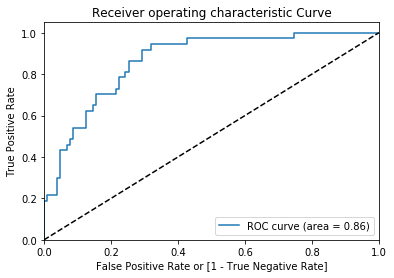

In [73]:
#Draw a roc curve

fpr, tpr, thresholds = metrics.roc_curve(bankloans_test_pred_log.actual, bankloans_test_pred_log.default_1, 
                                         drop_intermediate= False)


plt.plot(fpr, tpr , label = 'ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Curve')
plt.legend(loc="lower right")
plt.show()

<big>
- Cutoff would be optimum where specificity(1-FPR) and sensitivity(TPR) would be maximum for the given cutoff

In [74]:
##TPR - Sensitivity
##1-FPR - Specificity

i = np.arange(len(tpr))

roc_like_df = pd.DataFrame({'falsepositiverate' : pd.Series(fpr, index=i),'sensitivity' : pd.Series(tpr, index = i), 
              'specificity' : pd.Series(1-fpr, index = i),'cutoff' : pd.Series(thresholds, index = i)})
roc_like_df['total'] = roc_like_df['sensitivity'] + roc_like_df['specificity']

In [75]:
#Here we see the highest cutoff is 0.224326
roc_like_df[roc_like_df['total']==roc_like_df['total'].max()]

,falsepositiverate,sensitivity,specificity,cutoff,total
64,0.291262,0.918919,0.708738,0.218569,1.627657


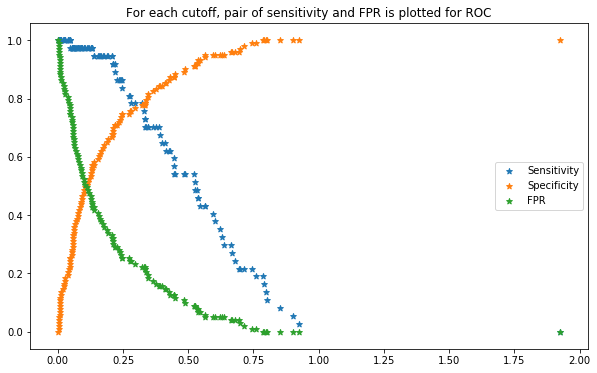

In [76]:
plt.subplots(figsize=(10,6))
plt.scatter(roc_like_df['cutoff'], roc_like_df['sensitivity'], marker='*', label='Sensitivity')
plt.scatter(roc_like_df['cutoff'], roc_like_df['specificity'], marker='*', label='Specificity')
plt.scatter(roc_like_df['cutoff'], roc_like_df['falsepositiverate'], marker='*', label='FPR')
plt.title('For each cutoff, pair of sensitivity and FPR is plotted for ROC')
plt.legend()

plt.show()

#My Assumption : x is cutoff , y is sens,spec,falsep etc. we choose 0.224 (sens & spec intercept there i.e it has highest value)

In [77]:
#Predicting with new cut-off probability
bankloans_test_pred_log['new_labels'] = bankloans_test_pred_log['default_1'].map( lambda x: 1 if x >= 0.224326 else 0 )

bankloans_test_pred_log.head()

,index,actual,predicted,default_0,default_1,new_labels
0,145,0.0,0.0,0.789495,0.210505,0
1,526,0.0,0.0,0.937453,0.062547,0
2,689,0.0,0.0,0.720855,0.279145,1
3,430,1.0,1.0,0.198867,0.801133,1
4,245,0.0,0.0,0.624400,0.375600,1


In [78]:
#creating a confusion matrix

cm_logreg = metrics.confusion_matrix(bankloans_test_pred_log.actual,
                                    bankloans_test_pred_log.new_labels,labels = [1,0])
cm_logreg

array([[32,  5],
       [30, 73]], dtype=int64)

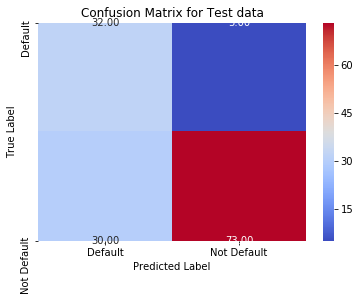

In [79]:
sns.heatmap(cm_logreg,annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels = ["Default", "Not Default"] , yticklabels = ["Default", "Not Default"])
plt.title("Confusion Matrix for Test data")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [80]:
#classification report 

print(metrics.classification_report(bankloans_test_pred_log.actual,bankloans_test_pred_log.new_labels))

              precision    recall  f1-score   support

         0.0       0.94      0.71      0.81       103
         1.0       0.52      0.86      0.65        37

    accuracy                           0.75       140
   macro avg       0.73      0.79      0.73       140
weighted avg       0.82      0.75      0.76       140



In [81]:
#ability of the classifier to find all the positive samples

recall_score = metrics.recall_score(bankloans_test_pred_log.actual, bankloans_test_pred_log.new_labels)
print("recall_score:", round(recall_score , 3))

recall_score: 0.865


In [82]:
#find the overall accuracy of model

acc_score = metrics.accuracy_score(bankloans_test_pred_log.actual,bankloans_test_pred_log.new_labels)
print("Accuracy of model :", round(acc_score,3))

Accuracy of model : 0.75


#### Inference
-----

<big>
Even though the overall accuracy of the model is reduced from 80% to 75% by taking optimum cutoff as 0.224, Model performance i.e recall score (ability of the model to find all the positive samples - find all the default customers) has increased from 54% to 89%. The drawback of changing the cutoff value can be seen in drastic drop of precision score (ability of model not to label non default customers as default customers) from 67% to 52%. 

</big>

- We have a choice to make depending on the value we place on the true positives and our tolerance for false postivies, in practical the cutoff values depends on the business decision values.

# Model 2 : Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
#Fit the model
RF = RandomForestClassifier(n_estimators = 400).fit(train_X,train_y)

In [85]:
#Predicting the test cases
bankloans_test_pred_RFlog = pd.DataFrame({'actual':test_y, 'predicted': RF.predict(test_X)}) #here we predict
bankloans_test_pred_RFlog = bankloans_test_pred_RFlog.reset_index()
bankloans_test_pred_RFlog.head()

,index,actual,predicted
0,145,0.0,0.0
1,526,0.0,0.0
2,689,0.0,0.0
3,430,1.0,1.0
4,245,0.0,0.0


In [86]:
#creating a confusion matrix

cm_RF = metrics.confusion_matrix(bankloans_test_pred_RFlog.actual,
                                    bankloans_test_pred_RFlog.predicted,labels = [1,0])
cm_RF

array([[13, 24],
       [ 9, 94]], dtype=int64)

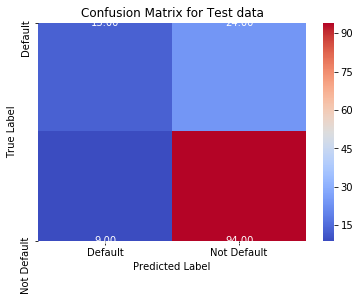

In [87]:
#Visualize the confusion matrix
sns.heatmap(cm_RF,annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels = ["Default", "Not Default"] , yticklabels = ["Default", "Not Default"])
plt.title("Confusion Matrix for Test data")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [88]:
#find precision score

prec_score = metrics.precision_score(bankloans_test_pred_RFlog.actual, bankloans_test_pred_RFlog.predicted)
print("Precision score :", round(prec_score,3))


Precision score : 0.591


In [89]:
#intuitively the ability of the classifier to find all the positive samples

recall_score = metrics.recall_score(bankloans_test_pred_RFlog.actual, bankloans_test_pred_RFlog.predicted)
print("recall_score:", round(recall_score , 3))

recall_score: 0.351


In [90]:
#find the overall accuracy of model

acc_score = metrics.accuracy_score(bankloans_test_pred_RFlog.actual,bankloans_test_pred_RFlog.predicted)
print("Accuracy of model :", round(acc_score,3))

Accuracy of model : 0.764


In [91]:
#probabilty of prediction
#logreg.predict_proba() Function used
# here 0.789495… is the probability that the output will be 0 and 0.210505… is the probability of output being 1

predict_prob_RF = pd.DataFrame(RF.predict_proba(test_X))
predict_prob_RF.head()

,0,1
0,0.7600,0.2400
1,0.9350,0.0650
2,0.6925,0.3075
3,0.2350,0.7650
4,0.5825,0.4175


In [92]:
bankloans_test_pred_RFlog.actual.value_counts()

0.0    103
1.0     37
Name: actual, dtype: int64

In [93]:
predict_prob_RF.head()

,0,1
0,0.7600,0.2400
1,0.9350,0.0650
2,0.6925,0.3075
3,0.2350,0.7650
4,0.5825,0.4175


In [94]:
predict_prob_df.head(1)

,0,1
0,0.789495,0.210505


In [95]:
bankloans_test_pred_RFlog = pd.concat([bankloans_test_pred_RFlog, predict_prob_RF], axis = 1)
bankloans_test_pred_RFlog.columns = ['index', 'actual', 'predicted', 'default_0','default_1']

bankloans_test_pred_RFlog.head()

,index,actual,predicted,default_0,default_1
0,145,0.0,0.0,0.7600,0.2400
1,526,0.0,0.0,0.9350,0.0650
2,689,0.0,0.0,0.6925,0.3075
3,430,1.0,1.0,0.2350,0.7650
4,245,0.0,0.0,0.5825,0.4175


In [96]:
#Predicting with new cut-off probability
bankloans_test_pred_RFlog['new_labels'] = bankloans_test_pred_RFlog['default_1'].map( lambda x: 1 if x >= 0.224326 else 0 )

bankloans_test_pred_RFlog.head()

,index,actual,predicted,default_0,default_1,new_labels
0,145,0.0,0.0,0.7600,0.2400,1
1,526,0.0,0.0,0.9350,0.0650,0
2,689,0.0,0.0,0.6925,0.3075,1
3,430,1.0,1.0,0.2350,0.7650,1
4,245,0.0,0.0,0.5825,0.4175,1


In [97]:
#Again Test the model

In [98]:
#creating a confusion matrix

cm_RF = metrics.confusion_matrix(bankloans_test_pred_RFlog.actual,
                                    bankloans_test_pred_RFlog.new_labels,labels = [1,0])
cm_RF

array([[32,  5],
       [33, 70]], dtype=int64)

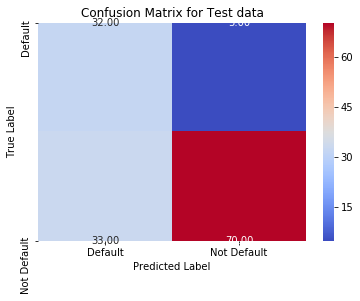

In [99]:
#Visualize the confusion matrix
sns.heatmap(cm_RF,annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels = ["Default", "Not Default"] , yticklabels = ["Default", "Not Default"])
plt.title("Confusion Matrix for Test data")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [100]:
#find precision score

prec_score = metrics.precision_score(bankloans_test_pred_RFlog.actual, bankloans_test_pred_RFlog.new_labels)
print("Precision score :", round(prec_score,3))

Precision score : 0.492


In [101]:
#find the overall accuracy of model

acc_score = metrics.accuracy_score(bankloans_test_pred_RFlog.actual,bankloans_test_pred_RFlog.new_labels)
print("Accuracy of model :", round(acc_score,3))

Accuracy of model : 0.729


In [102]:
#intuitively the ability of the classifier to find all the positive samples

recall_score = metrics.recall_score(bankloans_test_pred_RFlog.actual, bankloans_test_pred_RFlog.new_labels)
print("recall_score:", round(recall_score , 3))

recall_score: 0.865


In [103]:
bankloans_test_pred_RFlog.actual.value_counts()

0.0    103
1.0     37
Name: actual, dtype: int64

In [104]:
#classification report 
print("Classification Report for Random Forest")
print(metrics.classification_report(bankloans_test_pred_RFlog.actual,bankloans_test_pred_RFlog.new_labels))

Classification Report for Random Forest
              precision    recall  f1-score   support

         0.0       0.93      0.68      0.79       103
         1.0       0.49      0.86      0.63        37

    accuracy                           0.73       140
   macro avg       0.71      0.77      0.71       140
weighted avg       0.82      0.73      0.74       140



# Model 3 :  Decision Tree Classifier

In [105]:
from sklearn.tree import DecisionTreeClassifier

In [106]:
#Fit the model
DT = DecisionTreeClassifier().fit(train_X,train_y)

In [107]:
#Predicting the test cases
bankloans_test_pred_DTlog = pd.DataFrame({'actual':test_y, 'predicted': DT.predict(test_X)}) #here we predict
bankloans_test_pred_DTlog = bankloans_test_pred_DTlog.reset_index()
bankloans_test_pred_DTlog.head()

,index,actual,predicted
0,145,0.0,1.0
1,526,0.0,0.0
2,689,0.0,1.0
3,430,1.0,1.0
4,245,0.0,0.0


In [108]:
#creating a confusion matrix

cm_DT = metrics.confusion_matrix(bankloans_test_pred_DTlog.actual,
                                    bankloans_test_pred_DTlog.predicted,labels = [1,0])
cm_DT

array([[16, 21],
       [23, 80]], dtype=int64)

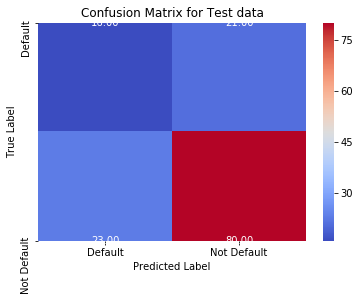

In [109]:
#Visualize the confusion matrix
sns.heatmap(cm_DT,annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels = ["Default", "Not Default"] , yticklabels = ["Default", "Not Default"])
plt.title("Confusion Matrix for Test data")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [110]:
#find precision score

prec_score = metrics.precision_score(bankloans_test_pred_RFlog.actual, bankloans_test_pred_RFlog.predicted)
print("Precision score :", round(prec_score,3))


Precision score : 0.591


In [111]:
#intuitively the ability of the classifier to find all the positive samples

recall_score = metrics.recall_score(bankloans_test_pred_RFlog.actual, bankloans_test_pred_RFlog.predicted)
print("recall_score:", round(recall_score , 3))

recall_score: 0.351


In [113]:
#find the overall accuracy of model

acc_score = metrics.accuracy_score(bankloans_test_pred_RFlog.actual,bankloans_test_pred_RFlog.predicted)
print("Accuracy of model :", round(acc_score,3))

Accuracy of model : 0.764


In [114]:
#probabilty of prediction
#logreg.predict_proba() Function used
# here 0.789495… is the probability that the output will be 0 and 0.210505… is the probability of output being 1

predict_prob_DT = pd.DataFrame(RF.predict_proba(test_X))
predict_prob_DT.head()

,0,1
0,0.7600,0.2400
1,0.9350,0.0650
2,0.6925,0.3075
3,0.2350,0.7650
4,0.5825,0.4175


In [115]:
bankloans_test_pred_DTlog = pd.concat([bankloans_test_pred_DTlog, predict_prob_RF], axis = 1)
bankloans_test_pred_DTlog.columns = ['index', 'actual', 'predicted', 'default_0','default_1']

bankloans_test_pred_DTlog.head()

,index,actual,predicted,default_0,default_1
0,145,0.0,1.0,0.7600,0.2400
1,526,0.0,0.0,0.9350,0.0650
2,689,0.0,1.0,0.6925,0.3075
3,430,1.0,1.0,0.2350,0.7650
4,245,0.0,0.0,0.5825,0.4175


In [116]:
#Predicting with new cut-off probability
bankloans_test_pred_DTlog['new_labels'] = bankloans_test_pred_DTlog['default_1'].map( lambda x: 1 if x >= 0.224326 else 0 )

bankloans_test_pred_DTlog.head()

,index,actual,predicted,default_0,default_1,new_labels
0,145,0.0,1.0,0.7600,0.2400,1
1,526,0.0,0.0,0.9350,0.0650,0
2,689,0.0,1.0,0.6925,0.3075,1
3,430,1.0,1.0,0.2350,0.7650,1
4,245,0.0,0.0,0.5825,0.4175,1


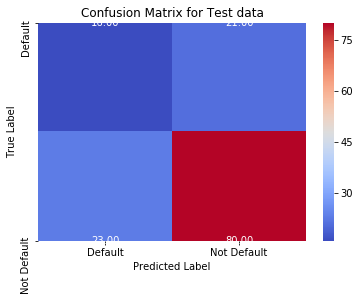

In [117]:
#Visualize the confusion matrix
sns.heatmap(cm_DT,annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels = ["Default", "Not Default"] , yticklabels = ["Default", "Not Default"])
plt.title("Confusion Matrix for Test data")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [118]:
#find precision score

prec_score = metrics.precision_score(bankloans_test_pred_DTlog.actual, bankloans_test_pred_DTlog.new_labels)
print("Precision score :", round(prec_score,3))

Precision score : 0.492


In [119]:
#find the overall accuracy of model

acc_score = metrics.accuracy_score(bankloans_test_pred_DTlog.actual,bankloans_test_pred_DTlog.new_labels)
print("Accuracy of model :", round(acc_score,3))


Accuracy of model : 0.729


In [120]:
#intuitively the ability of the classifier to find all the positive samples

recall_score = metrics.recall_score(bankloans_test_pred_DTlog.actual, bankloans_test_pred_DTlog.new_labels)
print("recall_score:", round(recall_score , 3))


recall_score: 0.865


In [121]:
#classification report 
print(metrics.classification_report(bankloans_test_pred_DTlog.actual,bankloans_test_pred_DTlog.new_labels))

              precision    recall  f1-score   support

         0.0       0.93      0.68      0.79       103
         1.0       0.49      0.86      0.63        37

    accuracy                           0.73       140
   macro avg       0.71      0.77      0.71       140
weighted avg       0.82      0.73      0.74       140



Model Selection and Business Insights

- Based on the F1-score (harmonic mean of precision and recall), logistic model with f1 score (for positive labels - default customers) of 0.66 is giving better results than decision tree model with f1 score of 0.44 And Better than Random Forest 0.63. -So we will use the logistic regression model to predict the credit worthiness of the customers 
# We will Predict the credit risk for remainimg 150 customers using the logistic model with cutoff as 0.224 

In [122]:
#probability for new customers
print("probability for new customers")
new_cust_prob = pd.DataFrame(logreg.predict_proba(bankloans_new[featurecolumns]))
new_cust_prob.columns = ["prob_default_0", "prob_default_1"]
new_cust_prob.index = bankloans_new.index

probability for new customers


In [123]:
new_cust_prob.head()

,prob_default_0,prob_default_1
700,0.986505,0.013495
701,0.937439,0.062561
702,0.303234,0.696766
703,0.929996,0.070004
704,0.654138,0.345862


In [124]:
bankloans_new_predicted = pd.concat([bankloans_new,new_cust_prob],axis=1)
bankloans_new_predicted.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default,prob_default_0,prob_default_1
700,36,1,16,13,32,10.9,0.544128,2.943872,NaN,0.986505,0.013495
701,50,1,6,27,21,12.9,1.316574,1.392426,NaN,0.937439,0.062561
702,40,1,9,9,33,17.0,4.880700,0.729300,NaN,0.303234,0.696766
703,31,1,5,7,23,2.0,0.046000,0.414000,NaN,0.929996,0.070004
704,29,1,4,0,24,7.8,0.866736,1.005264,NaN,0.654138,0.345862


In [125]:
#using the cutoff value we will predict the default

bankloans_new_predicted['predicted_default'] = bankloans_new_predicted["prob_default_1"].apply(lambda x: 1 if x > 0.224 else 0)

In [126]:
bankloans_new_predicted.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default,prob_default_0,prob_default_1,predicted_default
700,36,1,16,13,32,10.9,0.544128,2.943872,NaN,0.986505,0.013495,0
701,50,1,6,27,21,12.9,1.316574,1.392426,NaN,0.937439,0.062561,0
702,40,1,9,9,33,17.0,4.880700,0.729300,NaN,0.303234,0.696766,1
703,31,1,5,7,23,2.0,0.046000,0.414000,NaN,0.929996,0.070004,0
704,29,1,4,0,24,7.8,0.866736,1.005264,NaN,0.654138,0.345862,1


In [127]:
#Model Prediction For the New customers (150)

bankloans_new_predicted.predicted_default.value_counts()

0    86
1    64
Name: predicted_default, dtype: int64

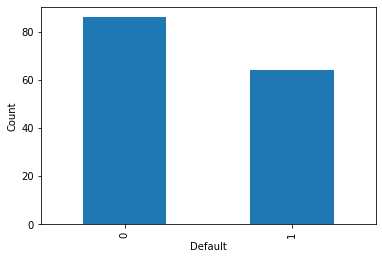

In [128]:
#Model Prediction

bankloans_new_predicted.predicted_default.value_counts().plot.bar()

plt.ylabel("Count")
plt.xlabel("Default")
plt.show()

In [129]:
bankloans_new_predicted.to_csv('Predictions For New.csv')

Model Selection and Business Insights

- Based on the F1-score (harmonic mean of precision and recall), logistic model with f1 score (for positive labels - default customers) of 0.66 is giving better results than decision tree model with f1 score of 0.44 And Better than Random Forest 0.63. -So we will use the logistic regression model to predict the credit worthiness of the customers 
-We will Predict the credit risk for remainimg 150 customers using the logistic model with cutoff as 0.224 

## Finally, let's save the winning model.
- We need to save your prediction models to file, and then restore them in order to reuse your previous work to: test your model on new data, compare multiple models, or anything else.
- Pickle is the standard way of serializing objects in Python.Pickle operation to serialize your machine learning algorithms and save the serialized format to a file.
- Later you can load this file to deserialize your model and use it to make new predictions.

In [130]:
import pickle

Let's save the winning <code style="color:steelblue">Logistic Model</code> object into a pickle file.

In [131]:
import joblib

In [132]:
#Save the Model
joblib.dump(RF,"C:/Users/Abhishek/Desktop/Bank_Loan_Edwisor/Bank_Loan_Python/Logreg_Model.pkl")

['C:/Users/Abhishek/Desktop/Bank_Loan_Edwisor/Bank_Loan_Python/Logreg_Model.pkl']

In [133]:
#Load the model from the file 
Logreg_Model = joblib.load('Logreg_Model.pkl')
print("Done")

Done


In [134]:
#Loaded model then can be used some time later...
 
